In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
try:
    team = pd.read_csv('./Team/team_data.csv')
    print('Let\'s go..................')
except:
    print('No such dataset')

Let's go..................


In [5]:
# check the first 5 elements
team.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [6]:
# check last 5 elements
team.tail()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
27,Switzerland,24,28.5,49.0,4,44,360,4.0,5,4,...,53,49,6,0,0,0,190,45,49,47.9
28,Tunisia,21,27.7,44.3,3,33,270,3.0,1,1,...,40,28,7,0,0,0,170,48,57,45.7
29,United States,20,25.4,53.0,4,44,360,4.0,3,3,...,45,40,5,0,1,0,212,53,53,50.0
30,Uruguay,19,28.5,48.7,3,33,270,3.0,2,1,...,34,36,3,0,2,0,166,53,47,53.0
31,Wales,18,27.7,46.7,3,33,270,3.0,1,0,...,35,33,4,1,0,0,147,42,41,50.6


In [7]:
# check shape - rows/columns
team.shape

(32, 189)

In [8]:
# columns
team.columns

Index(['team', 'players_used', 'avg_age', 'possession', 'games',
       'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=189)

In [22]:
# check the count of features/ non-null values in each column -> 

team.count()

team               32
players_used       32
avg_age            32
possession         32
games              32
                   ..
own_goals          32
ball_recoveries    32
aerials_won        32
aerials_lost       32
aerials_won_pct    32
Length: 189, dtype: int64

In [9]:
# summary statistics
team.describe().T

,count,mean,std,min,25%,50%,75%,max
players_used,32.0,21.25000,1.951013,18.0,20.000,21.00,22.000,26.0
avg_age,32.0,28.06250,1.166674,25.4,27.475,28.10,28.725,30.6
possession,32.0,49.44375,9.457066,31.3,42.750,50.15,54.775,75.8
games,32.0,4.00000,1.344043,3.0,3.000,3.50,4.250,7.0
games_starts,32.0,44.00000,14.784473,33.0,33.000,38.50,46.750,77.0
...,...,...,...,...,...,...,...,...
own_goals,32.0,0.06250,0.245935,0.0,0.000,0.00,0.000,1.0
ball_recoveries,32.0,202.87500,75.936625,132.0,146.750,173.00,225.500,409.0
aerials_won,32.0,54.15625,17.984060,30.0,42.000,49.00,67.000,106.0
aerials_lost,32.0,54.15625,17.557480,21.0,40.500,52.00,63.750,90.0


In [10]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 189 entries, team to aerials_won_pct
dtypes: float64(59), int64(129), object(1)
memory usage: 47.4+ KB


In [11]:
team.dtypes

team                object
players_used         int64
avg_age            float64
possession         float64
games                int64
                    ...   
own_goals            int64
ball_recoveries      int64
aerials_won          int64
aerials_lost         int64
aerials_won_pct    float64
Length: 189, dtype: object

In [12]:
# Let's replace the empty strings with NaN values

team = team.replace(' ', np.nan)

# Let's replace the question marks (?) with NaN values

team = team.replace('?', np.nan)

# Let's replace the question marks (.) with NaN values

team = team.replace('.', np.nan)

# Let's replace \N (always add an extra forward class)-> (\\N) with NaN values

team = team.replace('\\N', np.nan)

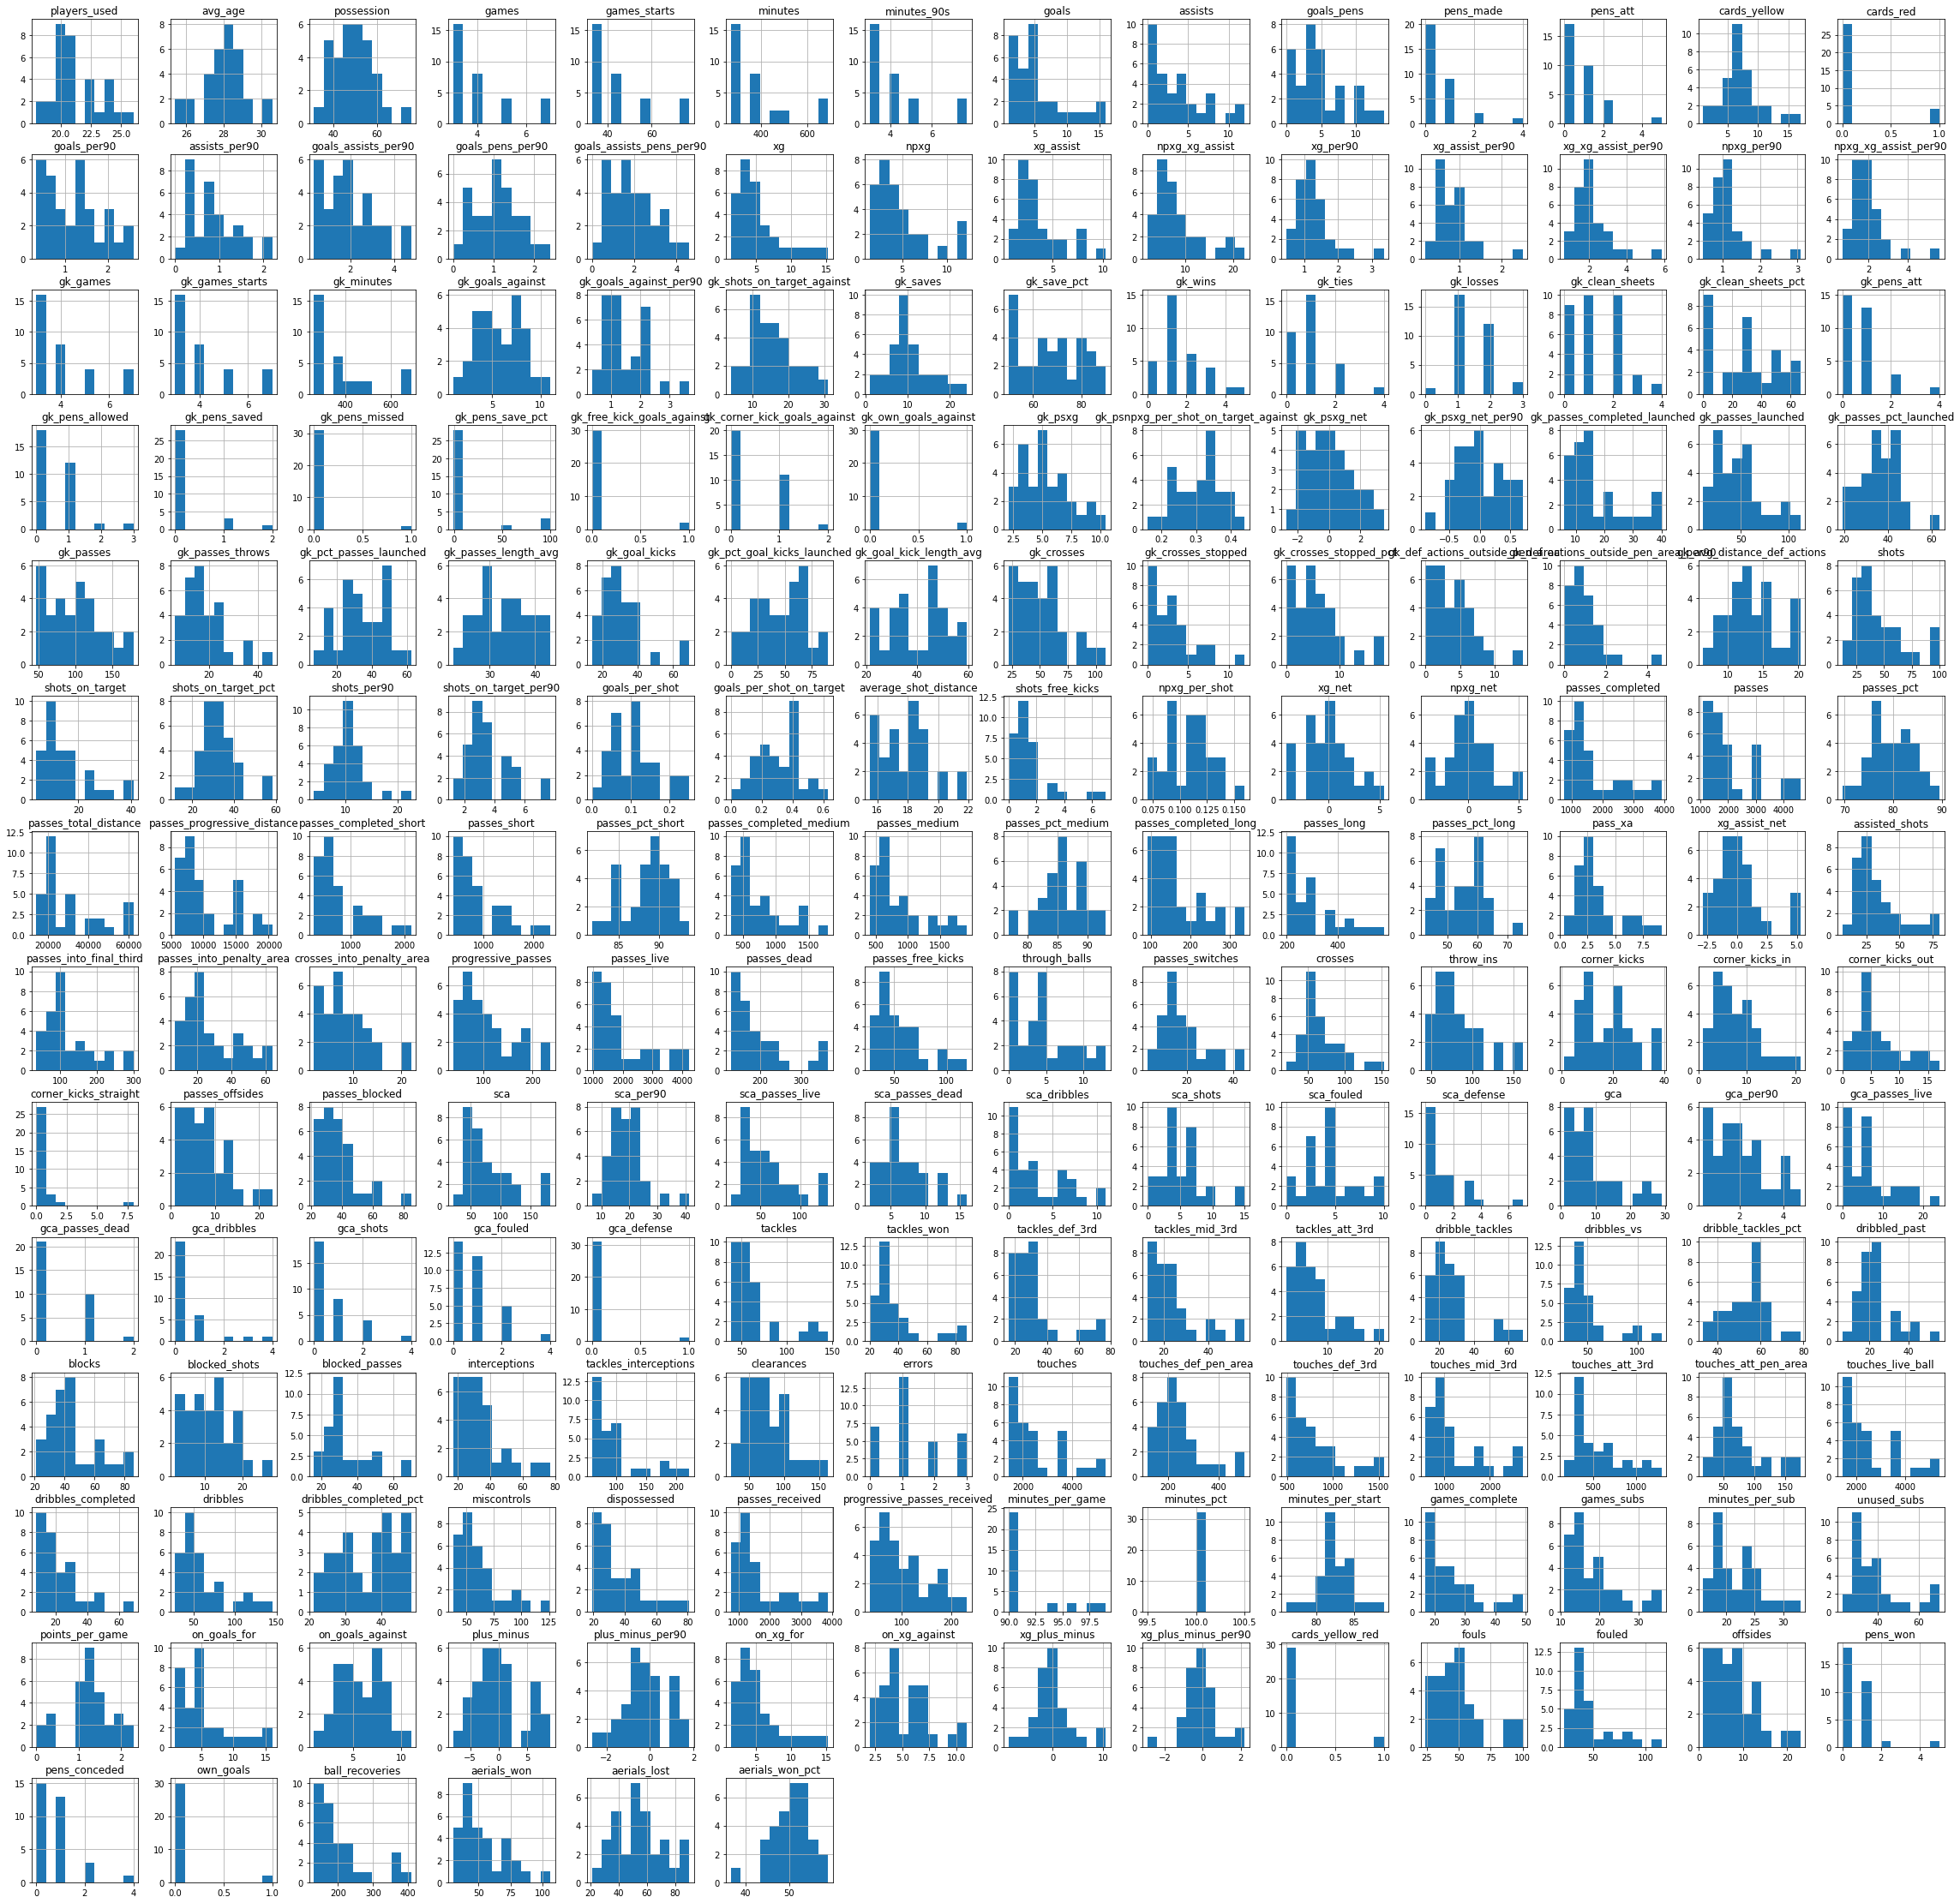

In [15]:
# check hist

team.hist(figsize=(40, 40))
plt.show()

In [16]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

team.nunique()

team               32
players_used        9
avg_age            21
possession         30
games               4
                   ..
own_goals           2
ball_recoveries    29
aerials_won        21
aerials_lost       27
aerials_won_pct    28
Length: 189, dtype: int64

Text(0.5, 1.0, 'Cardinality')

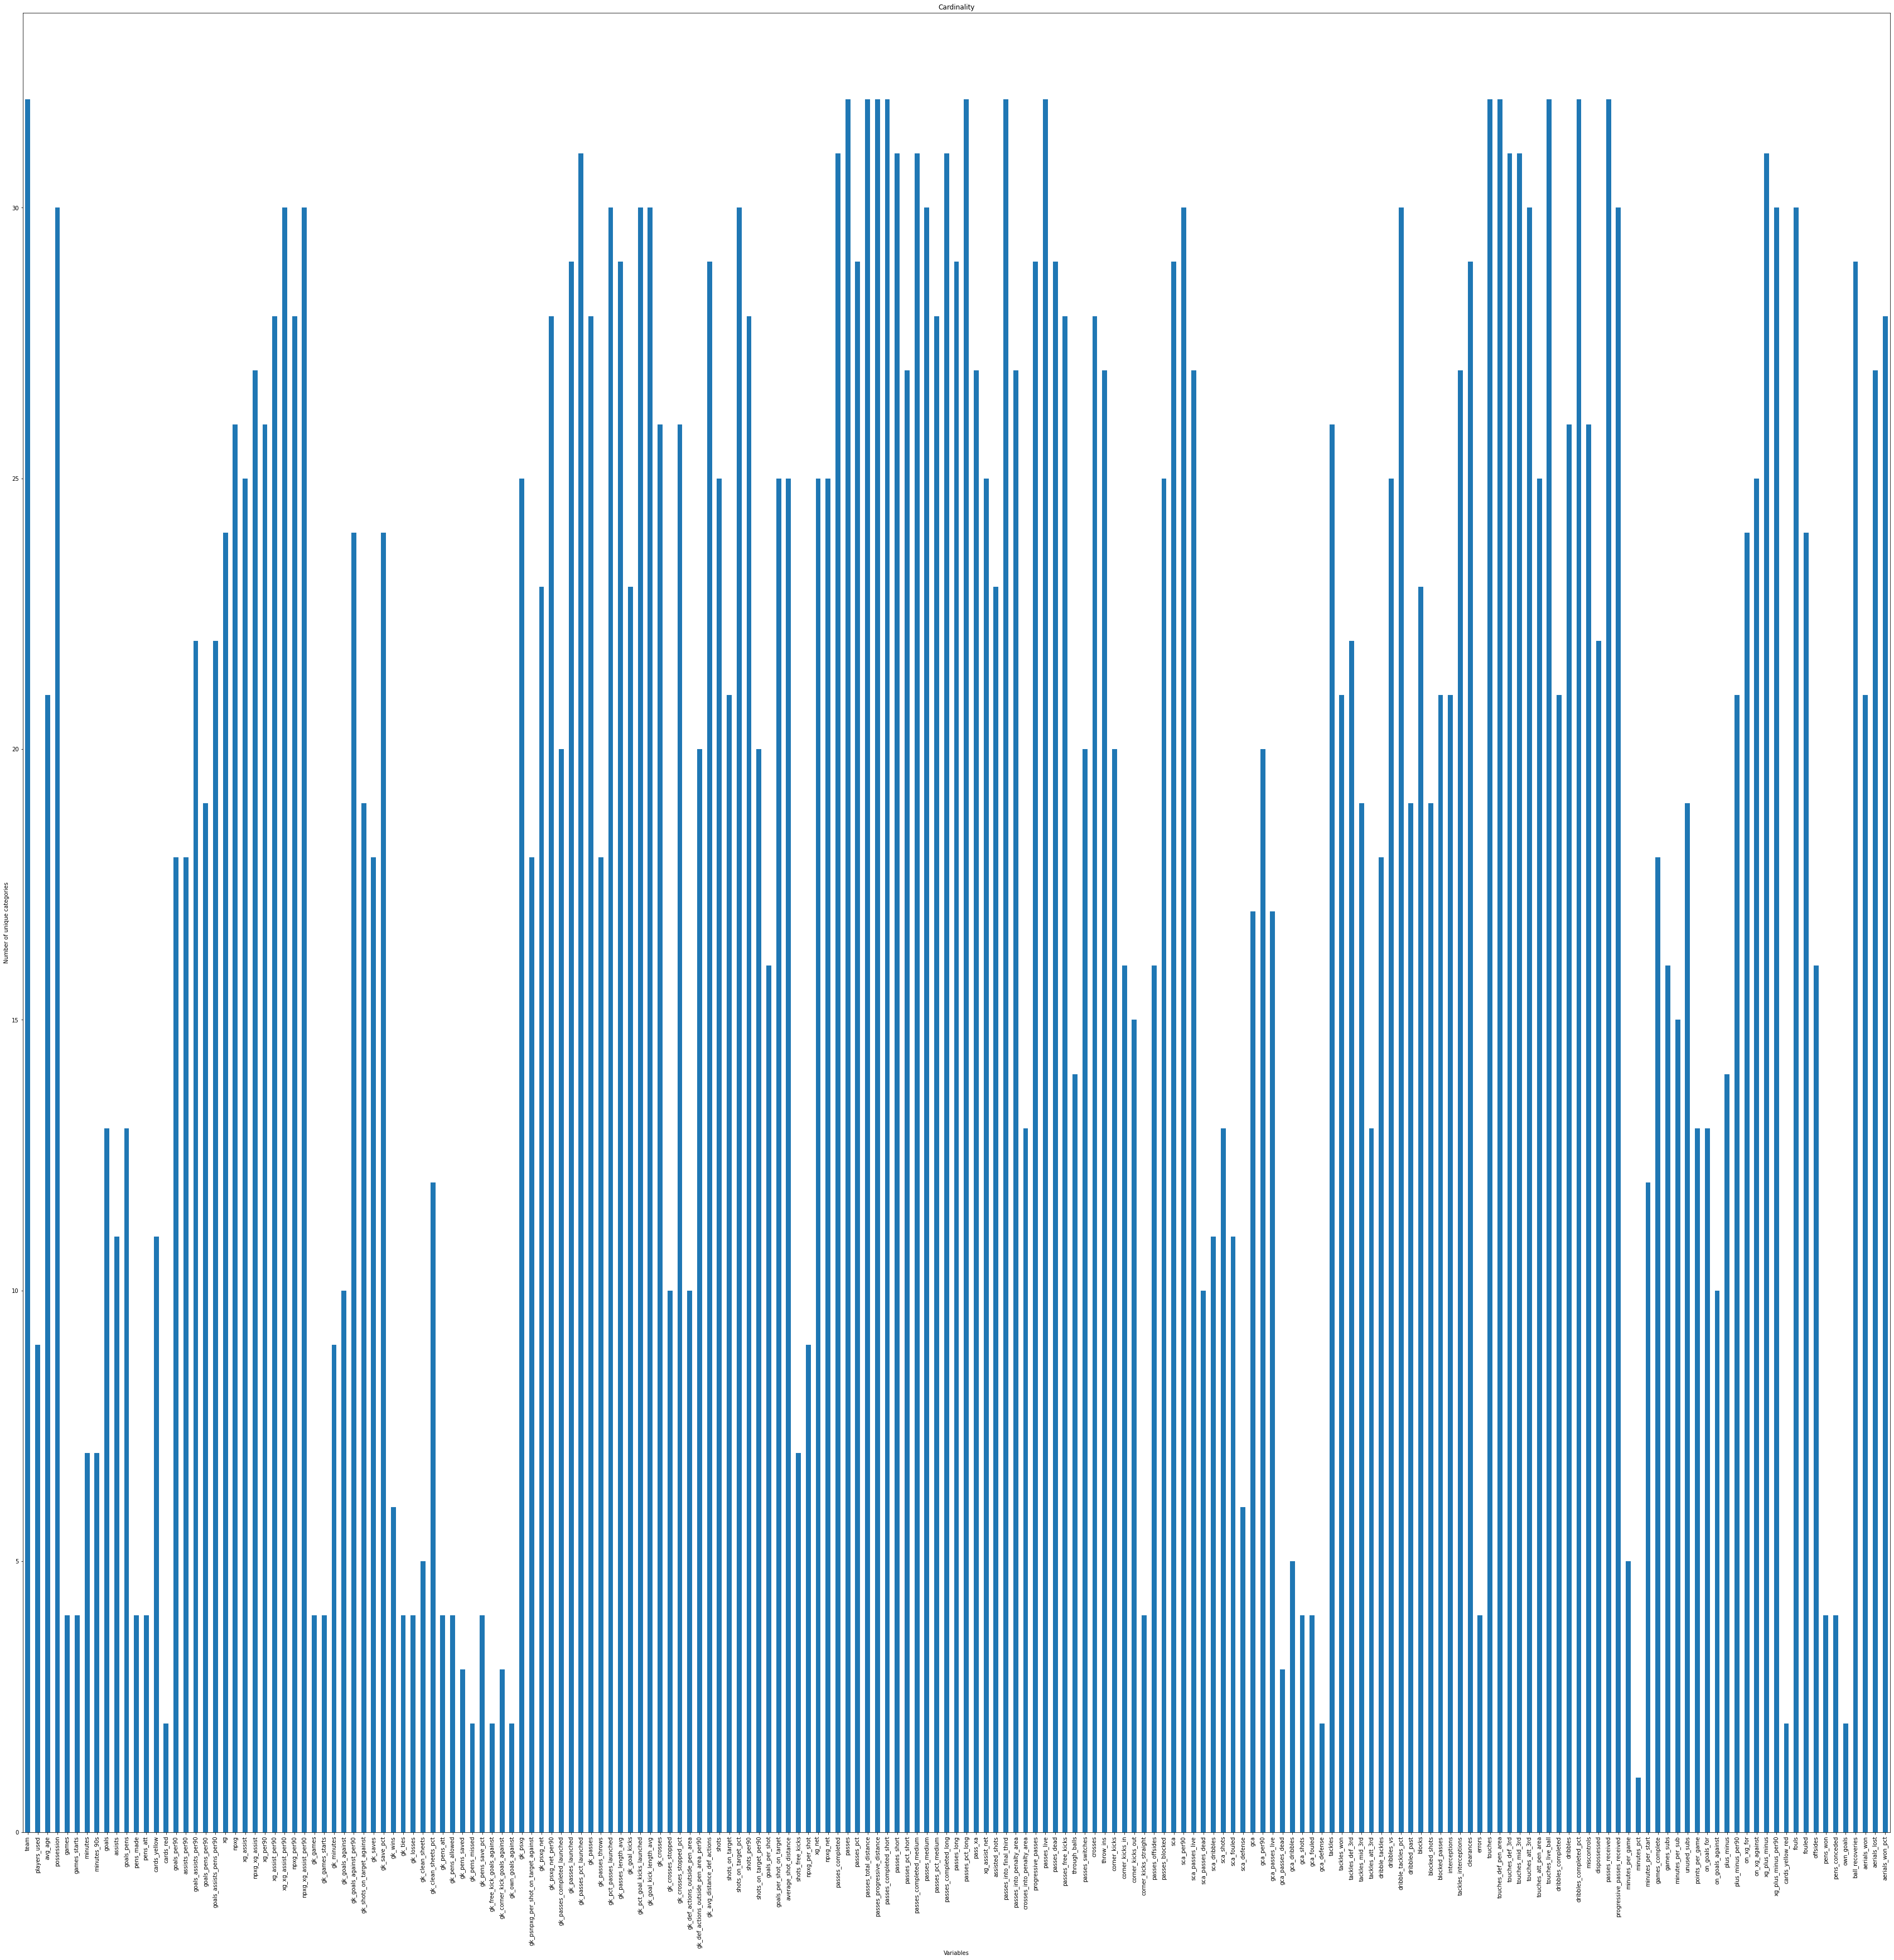

In [19]:
# plot the cardinality:

team.nunique().plot.bar(figsize=(60,60))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [20]:
# display categorical features/columns -> 

categorical_columns = team.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['team'], dtype='object')

In [21]:
# display numerical features/columns -> 

numerical_columns = team.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['players_used', 'avg_age', 'possession', 'games', 'games_starts',
       'minutes', 'minutes_90s', 'goals', 'assists', 'goals_pens',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=188)

In [24]:
# check missing values -> 

team.isnull().sum().sum()

0

In [25]:
# print names or check all columns which have null values -> 

[val for val in team.columns if team[val].isnull().sum() > 0]

[]

In [29]:
# Checking correlation - how features are correlated

team.corr(numeric_only=True)

,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
players_used,1.000000,0.130382,-0.027711,0.578180,0.578180,0.575434,0.572721,0.518385,0.491619,0.526568,...,0.540420,0.579582,0.498118,0.206862,0.079094,0.436990,0.563496,0.315114,0.382098,-0.161948
avg_age,0.130382,1.000000,-0.358438,-0.102860,-0.102860,-0.089966,-0.087519,-0.242494,-0.221202,-0.247431,...,-0.143401,-0.036838,-0.005759,-0.154963,0.033067,-0.059024,-0.108888,-0.111946,-0.159232,0.163381
possession,-0.027711,-0.358438,1.000000,0.183742,0.183742,0.193908,0.193980,0.418743,0.437578,0.402733,...,0.076069,0.233149,0.217545,0.284514,-0.048784,-0.034500,0.211500,0.046882,-0.101435,0.241882
games,0.578180,-0.102860,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.779485,...,0.874515,0.911384,0.650994,0.392203,0.378206,0.585540,0.970946,0.816749,0.803786,-0.029744
games_starts,0.578180,-0.102860,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.779485,...,0.874515,0.911384,0.650994,0.392203,0.378206,0.585540,0.970946,0.816749,0.803786,-0.029744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
own_goals,0.436990,-0.059024,-0.034500,0.585540,0.585540,0.590545,0.591864,0.329466,0.180746,0.273131,...,0.632379,0.617999,0.663894,0.510733,0.083045,1.000000,0.553167,0.325924,0.498197,-0.202835
ball_recoveries,0.563496,-0.108888,0.211500,0.970946,0.970946,0.977109,0.977035,0.731576,0.730569,0.736345,...,0.841294,0.865388,0.666297,0.329031,0.298304,0.553167,1.000000,0.779368,0.782891,-0.053964
aerials_won,0.315114,-0.111946,0.046882,0.816749,0.816749,0.805572,0.805931,0.666787,0.657880,0.673997,...,0.736856,0.662458,0.454659,0.251036,0.501520,0.325924,0.779368,1.000000,0.833662,0.162984
aerials_lost,0.382098,-0.159232,-0.101435,0.803786,0.803786,0.804033,0.804420,0.569559,0.526664,0.577719,...,0.855730,0.683273,0.409820,0.347206,0.368945,0.498197,0.782891,0.833662,1.000000,-0.385356


In [34]:
# then plot the correlation of the top most correlated features:

e = team.corr(numeric_only=True)
top_correlated_features = e.index
g = sns.heatmap(team[top_correlated_features].corr(), annot=True, cmap='Blues_r')
plt.figure(figsize=(30,20))

# EDA

======

`1. players average age`

In [35]:
team.sample(n=2)

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
21,Portugal,24,27.8,60.4,5,55,450,5.0,12,10,...,55,65,14,1,0,0,256,66,53,55.5
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0


In [38]:
team['avg_age'].mean()

28.0625

    Observation: The players average height is `28.062`

In [42]:
fig = px.bar(team.sort_values('avg_age', ascending = True), 
            y="team", x="avg_age",color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b>Team's average age <b>",
            titlefont={'size':24},
)
age_avg = np.mean(team['avg_age'])

fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
colors = ['lightseagreen',] * 32 
colors[5] = 'crimson' 


fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

=========

`2. Number of players Involved`

In [43]:
team.sample(n=2)

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,22,23,24,25,26,27,28,29,30,31
12,Germany,20,28.1,59.3,3,33,270,3.0,6,5,...,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes
30,Uruguay,19,28.5,48.7,3,33,270,3.0,2,1,...,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes


In [44]:
team.players_used.count()

32

        Observation: Number of players used is `32`

In [45]:
fig = px.bar(team.sort_values('players_used', ascending = True), 
            y="team", x="players_used",color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b>Number of Players Used <b>",
            titlefont={'size':24},
)
age_avg = np.mean(team['players_used'])

fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
colors = ['lightseagreen',] * 32 
colors[30] = 'crimson' 


fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

=========

`3. The Ultimate *Goal* of a Football Game -- Goals and xG's`

In [49]:
team['goal_per_game'] = team['goals']/team['games']
team['xg_per_game'] = team['xg']/team['games']
team['npxg_per_game'] = team['npxg']/team['games']

fig = px.scatter(team,
                y='goal_per_game',
                x='xg_per_game',
                color='team',
                size='goal_per_game',
                width=850,
                height=500,
                text=team['team'])

fig.add_shape( 
    type="line", line_color="black", line_width=0.5, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=0, x1=1, xref="paper", 
)
fig.update_layout(showlegend=False, title='<b> Goals vs xG (expected goals) <b>', template='ggplot2',titlefont={'size':24})
fig.show()

fig = px.scatter(team,
                y='goal_per_game',
                x='npxg_per_game',
                color='team',
                size='goal_per_game',
                width=850,
                height=500,
                text=team['team'],)

fig.add_shape( 
    type="line", line_color="black", line_width=0.5, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=0, x1=1, xref="paper", 
)
fig.update_layout(showlegend=False, title='<b> Goals vs npxG (non-penality expected goals) <b>', template='ggplot2', titlefont={'size':24})
fig.show()

We observe the following from the data.

- Germany has the highest xG with 3.35 per game. But the could only convert 2 of them. Meaning they were the most wastefull of the teams. If you don't score the chance you are expected to score, probability you don't win against you are expected either. Remember Japan vs Germany?
- Of all the teams below the dotted line (higher xG than goals) only Brazil made it out of the group stage. 

======

`4. Shots on Target`

In [50]:
team['shots_per_game'] = team['shots']/team['games']
team['shots_on_target_per_game'] = team['shots_on_target']/team['games']
team['npxg_per_game'] = team['npxg']/team['games']

fig = px.scatter(team,
                x='shots_per_game',
                y='shots_on_target_per_game',
                color='team',
                size='goal_per_game',
                width=850,
                height=750,
                text=team['team'],
                )

fig.update_layout(showlegend=False, title='<b> Shots on target <b>', template='ggplot2', titlefont={'size':24})
fig.show()


# goals to shors ratio

team['goal_to_shot_ratio'] = team['goal_per_game']/team['shots_on_target_per_game']

fig = px.bar(team.sort_values('goal_to_shot_ratio', ascending = True), 
            y="team", x='goal_to_shot_ratio',color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b> Goals per shot_on_target ratio  <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen',] * 32 
colors[14] = 'crimson'
colors[11] = 'black' 
colors[7] = 'gold'

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

**Observations**:
- The most notable observation is that **Germany** under-performed in this tournament. Although they are leading the pack with total `shots_per_game` and `shot_on_target_per_game`, they are 12th from the **bottom** (~bottom third) in goal conversion rate.
- The Netherlands had the highest goal per shot_on_target ratio.
- And Morocco's ratio is right down the middle of the pack. In fact they are the second (next to France) from the four Semi-Finals teams. Not bad!

========

`5. Possessions/Passes/Dribbles`

In [51]:
fig = px.scatter(team,
                x='passes_completed',
                y='progressive_passes',
                color='team',
                size='possession',
                width=850,
                height=750,
                text=team['team']
                )

fig.update_layout(showlegend=False, title='<b> Passes completed vs progressive passes <b>', template='ggplot2', titlefont={'size':24})
fig.show()

team['passes_completed_pergame'] = team['passes_completed']/team['games']
team['progressive_passes_pergame'] = team['progressive_passes']/team['games']

fig = px.scatter(team,
                x='passes_completed_pergame',
                y='progressive_passes_pergame',
                color='team',
                size='possession',
                width=850,
                height=750,
                text=team['team']
                )

fig.update_layout(showlegend=False, title='<b> Passes completed vs progressive passes (per-game) <b>', template='ggplot2', titlefont={'size':24})
fig.show()

team['dribbles_completed_pergame'] = team['dribbles_completed']/team['games']

fig = px.bar(team.sort_values('dribbles_completed_pergame', ascending = True), 
            y="team", x='dribbles_completed_pergame',color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b> Dribbles Completed Per game <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen',] * 32 
colors[25] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

**Observations**:

For fair comparison we'll consider the per-game stats here.

- Spain had by far the most average ball possession (75.8%), a 13 percent more possession than the second placed team England.
- Spain is also a pass master. They led by quite a margin having made more than 300 passes more than Germany per game, 2nd on the list.
- On progressive passing statistics three teams stand out; Denmark, Germany and Spain. However, having failed to advance to the last-16 stage, Denmark and Germany must be wondering if they could have used their progressive passes a little more effectively. 
- The progressive to total pass ratio tells an interesting story. Spain's impressive ball possession and passes wasn't that effective going forward and finding key passes to score goals. 

========

In [53]:
team['progressive_passes_ratio'] = team['progressive_passes']/team['passes_completed']

fig = px.bar(team.sort_values('progressive_passes_ratio', ascending = True), 
            y="team", x='progressive_passes_ratio',color=None,
            width=750, 
            height=600,
            )

fig.update_layout(
            template='ggplot2',
            title="<b> Progressive to Total Passes Ratio  <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen',] * 32 
colors[5] = 'crimson'
colors[4] = 'gold'

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

======

`6 .`**The Messi Effect?**:

> In the graph below total passes completed vs the total distance covered by the passes is plotted. We can see that there is a linear relationship. More passes means more distance (kinda obvious). A straight line can be drawn through the dots. However, if we look closely Argentina deviates from the rest, i.e they seem to have made more short passes resulting in an overall distance a little less proportional to the total passes they have completed. Being the play-maker of his team, it is likely that he [Messi] is involved in most of the passes Argentina makes. Moreover, watching his games [historically] he plays a lot of one-two's and short intricate passes. Therefore, it is safe to say that what we see here could be described as **“the Messi effect”**.

In [54]:
fig = px.scatter(team,
                x='passes_completed',
                y='passes_total_distance',
                color='team',
                size='possession',
                width=850,
                height=750,
                text=team['team']
                )

fig.add_shape( 
    type="line", line_color="black", line_width=0.5, opacity=1, line_dash="dot",
    y0=0, y1=0.99, yref="paper", x0=0, x1=0.9, xref="paper", 
)

fig.add_shape(type="circle",
    xref="paper", yref="paper",
    fillcolor=None,opacity=0.2,
    x0=.89, y0=.84, x1=0.98, y1=0.94,
    line_color="black",
)

fig.update_layout(showlegend=False, title='<b> Total Passes Completed vs Total Distance of Passes <b>', template='ggplot2', titlefont={'size':24})
fig.show()

======

`7. Through Balls`

In [55]:
team['through_balls_pergame'] = team['through_balls']/team['games']

fig = px.bar(team.sort_values('through_balls_pergame', ascending = True), 
            y="team", x='through_balls_pergame',color=None,
            width=750, 
            height=600,
            )

fig.add_hrect(
    y0=27.5, y1=31.5,
    fillcolor="gold", opacity=0.7,
    layer="below", line_width=0,
)

fig.add_hrect(
    y0=8.5, y1=27.5,
    fillcolor="gray", opacity=0.2,
    layer="below", line_width=0,
)

fig.add_hrect(
    y0=-0.5, y1=8.5,
    fillcolor="#CD7F32", opacity=0.7,
    layer="below", line_width=0,
)

fig.update_layout(
            template='ggplot2',
            title="<b> Through Balls Per game <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen',] * 32 
colors[8] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

**Observations**:
- We notice that there are three clusters (above 2.5 *TBPG, below 0.5 TBPG and the middle cluster)
- Except Morocco which is in the bottom cluster, the other semi-finalist are in the middle group, none are in the top group - an indication that through balls aren't easy to execute.
- This stats also magnifies Belgium's and Spain's (the top two teams on this metric) underachievement or inefficiency in the final third of the pitch.
- Denmark occupies the last spot having made no through balls at all, a little strange for a team Christian Eriksen (one of the creative midfielders in Europe) is part of. 

=====

`8.  A case for Morocco`

Conceding only 0.71 goals per game (in normal time), Morocco occupies the 5th spot at the top. Considering that the other Semi-Fianlists (team who played the maximum number of games which is 7) conceded 1 or more goals per game, this is an impressive stat! It appears that they are a team built upon a strong defense line.

In [56]:
team['on_goals_against_pergame'] = team['on_goals_against']/team['games']

fig = px.bar(team.sort_values('on_goals_against_pergame', ascending = False), 
            y="team", x="on_goals_against_pergame",color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b> Goals conceded (per game) <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen'] * 32 
colors[27] = 'crimson' 


fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

======

`9. Blocked Passes/Shots`

In [58]:
team['blocked_passes_pergame'] = team['blocked_passes']/team['games']
team['blocked_shots_pergame'] = team['blocked_shots']/team['games']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=('Blocked Passes', 'Blocked Shots'),           
    
    print_grid=False)

fig.add_trace(go.Bar(x=team['blocked_passes_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=1).update_yaxes(categoryorder='total descending')

fig.add_trace(go.Bar(x=team['blocked_shots_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=2).update_yaxes(categoryorder='total ascending')

colors = ['lightseagreen',] * 32 
colors[18] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None,)

fig.update_layout(height=750, width=1100, template='ggplot2')
fig.show()

========

`10. Recoveries/Interceptions`

In [59]:
team['ball_recoveries_pergame'] = team['ball_recoveries']/team['games']
team['interceptions_pergame'] = team['interceptions']/team['games']
team['tackles_interceptions_pergame'] = team['tackles_interceptions']/team['games']


fig = make_subplots(
    rows=1, cols=3,
    specs=[[{}, {}, {}]],
    subplot_titles=('Ball Recoveries', 'Interceptions', 'Tackle Interceptions'),           
    
    print_grid=False)

fig.add_trace(go.Bar(x=team['ball_recoveries_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=1).update_yaxes(categoryorder='total descending')

fig.add_trace(go.Bar(x=team['interceptions_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=2).update_yaxes(categoryorder='total ascending')

fig.add_trace(go.Bar(x=team['tackles_interceptions_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=3).update_yaxes(categoryorder='total ascending')


colors = ['lightseagreen',] * 32 
colors[18] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None,)

fig.update_layout(height=750, width=1300, template='ggplot2')
fig.show()

**Observations**:

We can see that this aspect of the game is also well executed by **Morocco** in comparision to the rest of the teams competing at the world cup. 

=====

`11. Clearances`

In [60]:
team['clearances_pergame'] = team['clearances']/team['games']

fig = px.bar(team.sort_values('clearances_pergame', ascending = True), 
            y="team", x="clearances_pergame",color=None,
            width=750, 
            height=600,
            )
fig.update_layout(
            template='ggplot2',
            title="<b> Clearances Per Game <b>",
            titlefont={'size':24},
)

colors = ['lightseagreen',] * 32 
colors[22] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None)
fig.show()

===========

`12. Possessions Lost`

In [61]:
team['dispossessed_pergame'] = team['dispossessed']/team['games']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=('Possession Lost (per game)', 'Ball Possession (%)'),           
    
    print_grid=False)

fig.add_trace(go.Bar(x=team['dispossessed_pergame'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=1).update_yaxes(categoryorder='total descending')

fig.add_trace(go.Bar(x=team['possession'], 
                    y=team['team'], orientation='h', showlegend=False), row=1, col=2).update_yaxes(categoryorder='total ascending')

colors = ['lightseagreen',] * 32 
colors[18] = 'crimson' 

fig.update_traces(marker_color=colors, marker_line_color=None,
                marker_line_width=2.5, opacity=None,)

fig.update_layout(height=750, width=1100, template='ggplot2')
fig.show()

## Concluding Remarks:


- The Spanish football team has shown us possession is overrated; for their impressive ball possession (75.8% on average) they have posted during the tournament they were dumped by Morocco which averaged 39% ball-possession.

- Age (old) is not always a disadvantage as shown by Croatia (third oldest team in the Semi-Finals). Fro Belgium however it seem that they the paid the price for relying too much on the aging squad members. Both Belgium and Costa Rica, the oldest teams, were eliminated from the group stage.

- Morocco are the surprise teams of the tournament. However, it appears that the have done the **not-so-visible** part of the game efficiently and for that they deserve their history making 4th place finish. They are the crown of African fooball and they set the target for other teams [Africans team and other underdogs] to match. 

# END